<a href="https://colab.research.google.com/github/aypatil13/tele_coustmer_chrun/blob/main/Telecom_Churn_Customersds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data set/telecom_customer_churn.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
data.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [ ]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
data['Customer ID'].duplicated().value_counts()

False    7043
Name: Customer ID, dtype: int64

In [ ]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [ ]:
data['Churned'] = data['Customer Status'].apply(lambda x:1 if x=='Churned' else 0)
data['Stayed'] = data['Customer Status'].apply(lambda x:1 if x=='Stayed' else 0)
data['Joined'] = data['Customer Status'].apply(lambda x:1 if x=='Joined' else 0)
data['Married_Status'] = data['Married'].apply(lambda x:1 if x=='Yes' else 0)
data['M2M_Contract'] = data['Contract'].apply(lambda x:1 if x=='Month-to-Month' else 0)
data['1Y_Contract'] = data['Contract'].apply(lambda x:1 if x=='One Year' else 0)
data['2Y_Contract'] = data['Contract'].apply(lambda x:1 if x=='Two Year' else 0)

In [ ]:
data_correlation = data.corr(method ='pearson')
data_correlation

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churned,Stayed,Joined,Married_Status,M2M_Contract,1Y_Contract,2Y_Contract
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.020010,-0.566518,0.134511,...,0.025036,0.003065,0.048265,0.115760,-0.078918,-0.057041,-0.003666,-0.023270,-0.000922,0.027145
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002898,0.300802,-0.125649,...,-0.014436,0.068966,0.038038,-0.218780,0.220765,-0.029299,0.324205,-0.127753,0.007663,0.137108
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.012298,-0.002859,-0.002517,...,-0.014550,0.005063,0.002944,-0.016289,0.021121,-0.011150,-0.001577,-0.014166,-0.000098,0.016091
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.014450,-0.013485,-0.021613,...,-0.013233,0.008029,0.000082,-0.041546,0.040876,-0.003559,0.001059,-0.024147,-0.000532,0.027769
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.015420,0.015195,0.021052,...,0.010461,-0.006923,0.001062,0.024052,-0.023498,0.001743,0.003638,0.018001,0.006332,-0.026256
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001800,0.080243,0.026301,...,0.000350,0.216190,0.261853,-0.286540,0.314899,-0.087690,0.672867,-0.277742,0.075555,0.242949
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012713,0.038173,0.239065,...,0.082266,0.674149,0.853146,-0.352861,0.502714,-0.328021,0.380394,-0.628317,0.191918,0.529956
Avg Monthly Long Distance Charges,-0.020010,-0.002898,0.012298,0.014450,-0.015420,0.001800,0.012713,1.000000,0.019047,0.019149,...,0.021162,0.548759,0.173072,0.002774,0.007975,-0.020161,0.001924,-0.010485,0.034741,-0.020671
Avg Monthly GB Download,-0.566518,0.300802,-0.002859,-0.013485,0.015195,0.080243,0.038173,0.019047,1.000000,-0.017283,...,0.015451,0.024101,0.031922,-0.090274,0.090837,-0.008065,0.075953,-0.025590,0.025137,0.005702
Monthly Charge,0.134511,-0.125649,-0.002517,-0.021613,0.021052,0.026301,0.239065,0.019149,-0.017283,1.000000,...,0.121238,0.235685,0.563249,0.187833,-0.084912,-0.175151,0.094775,0.026132,0.013733,-0.042369


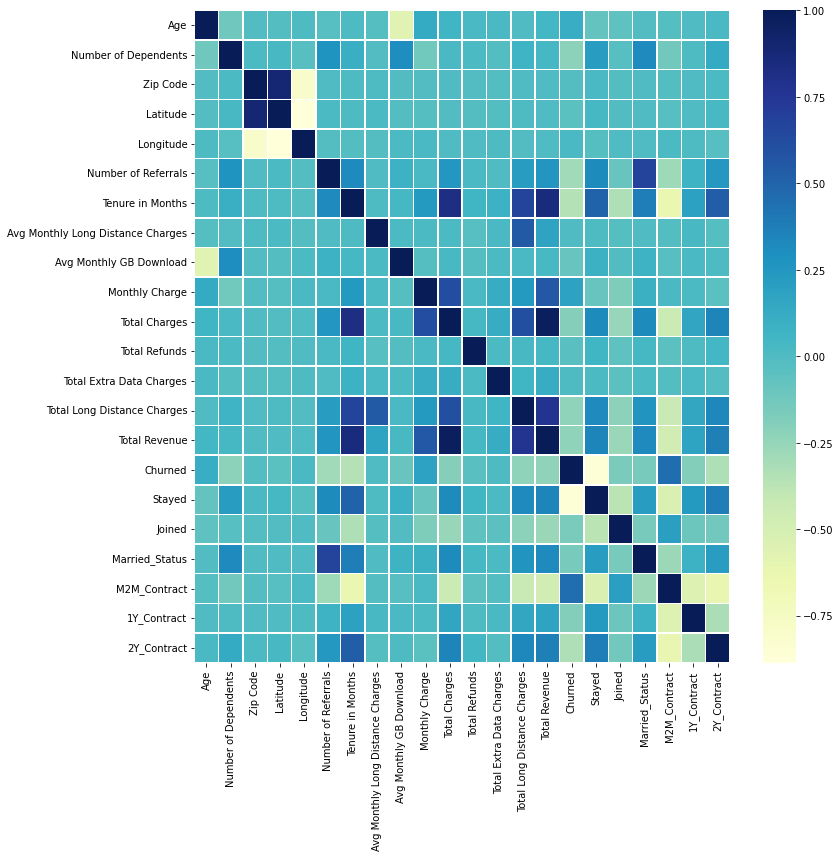

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data_correlation, linewidths=.5, ax=ax,cmap="YlGnBu")
plt.show()

In [ ]:
data['Customer Status'].count()

7043

In [ ]:
data['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [ ]:
data['Offer'].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

In [ ]:
data['Offer'].groupby(data['Customer Status']).value_counts()

Customer Status  Offer  
Churned          None       1051
                 Offer E     426
                 Offer D     161
                 Offer B     101
                 Offer C      95
                 Offer A      35
Joined           None        279
                 Offer E     175
Stayed           None       2547
                 Offer B     723
                 Offer A     485
                 Offer D     441
                 Offer C     320
                 Offer E     204
Name: Offer, dtype: int64

In [ ]:
data['Number of Referrals'].groupby(data['Customer Status']).value_counts()

Customer Status  Number of Referrals
Churned          0                      1245
                 1                       507
                 3                        32
                 2                        26
                 5                        21
                 4                        18
                 6                         8
                 7                         6
                 9                         4
                 8                         2
Joined           0                       373
                 1                        15
                 9                        12
                 5                         9
                 3                         8
                 10                        8
                 2                         7
                 6                         7
                 8                         7
                 7                         5
                 4                         3
Stayed           0

In [ ]:
data['Age'].mean()

46.50972596904728

In [ ]:
data['Age'].groupby(data['Customer Status']).mean()

Customer Status
Churned    49.735688
Joined     42.870044
Stayed     45.582415
Name: Age, dtype: float64

In [ ]:
data[data['Married']=='Yes'].groupby(data['Customer Status']).count()['Married']

Customer Status
Churned     669
Joined       84
Stayed     2649
Name: Married, dtype: int64

In [ ]:
data['Churn Reason'].groupby(data['Churn Category']).value_counts()

Churn Category   Churn Reason                             
Attitude         Attitude of support person                   220
                 Attitude of service provider                  94
Competitor       Competitor had better devices                313
                 Competitor made better offer                 311
                 Competitor offered more data                 117
                 Competitor offered higher download speeds    100
Dissatisfaction  Product dissatisfaction                       77
                 Network reliability                           72
                 Service dissatisfaction                       63
                 Limited range of services                     37
                 Poor expertise of online support              31
                 Lack of self-service on Website               29
                 Poor expertise of phone support               12
Other            Don't know                                   130
                 

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No')]['Customer Status'].value_counts()

Stayed     1231
Joined      182
Churned     113
Name: Customer Status, dtype: int64

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No')]['Offer'].groupby(data['Customer Status']).value_counts()

Customer Status  Offer  
Churned          None        52
                 Offer E     45
                 Offer D     10
                 Offer B      4
                 Offer C      2
Joined           None       123
                 Offer E     59
Stayed           None       678
                 Offer B    158
                 Offer D    155
                 Offer A     92
                 Offer C     79
                 Offer E     69
Name: Offer, dtype: int64

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No')]['Churn Category'].value_counts()

Attitude           42
Price              37
Competitor         22
Dissatisfaction     9
Other               3
Name: Churn Category, dtype: int64

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Churn Category'])]['Churn Reason'].value_counts()

Attitude of support person         37
Long distance charges              30
Competitor made better offer       22
Price too high                      7
Service dissatisfaction             5
Attitude of service provider        5
Limited range of services           3
Moved                               3
Poor expertise of phone support     1
Name: Churn Reason, dtype: int64

In [ ]:
data['Mul_line_encode'] = data['Multiple Lines'].apply(lambda x: 1 if x =='Yes' else 0)
data['Mul_line_encode'].value_counts()

0    4072
1    2971
Name: Mul_line_encode, dtype: int64

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No')&(data['Customer Status']=='Churned')]['Number of Dependents'].value_counts()

0    97
3     7
1     4
2     3
7     1
5     1
Name: Number of Dependents, dtype: int64

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No')&(data['Customer Status']=='Stayed')]['Number of Dependents'].value_counts()

0    721
1    175
2    169
3    161
4      3
5      1
7      1
Name: Number of Dependents, dtype: int64

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Customer Status']=='Churned')]['Total Long Distance Charges'].mean()

207.99566371681416

In [ ]:
data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Customer Status']=='Stayed')]['Total Long Distance Charges'].mean()

930.2920633631194

In [ ]:
phone_churned_charge = data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Customer Status']=='Churned')]['Total Charges']
phone_churned_tenure_months = data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Customer Status']=='Churned')]['Tenure in Months']

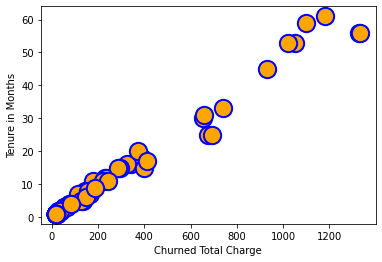

In [ ]:
plt.scatter(phone_churned_charge,phone_churned_tenure_months,c ="orange",
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s =300)
plt.xlabel("Churned Total Charge")
plt.ylabel("Tenure in Months")
plt.show()

In [ ]:
phone_stayed_charge = data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Customer Status']=='Stayed')]['Total Charges']
phone_stayed_tenure_months = data[(data['Phone Service']=='Yes') &(data['Internet Service']=='No') &(data['Customer Status']=='Stayed')]['Tenure in Months']

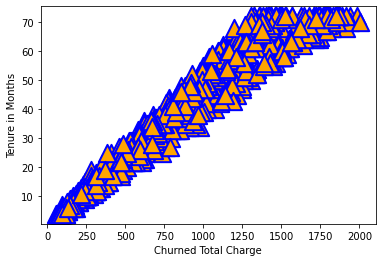

In [ ]:
plt.scatter(phone_stayed_charge,phone_stayed_tenure_months,c ="orange",
            linewidths = 2,
            marker ="^",
            edgecolor ="blue",
            s =300)
plt.xlabel("Churned Total Charge")
plt.ylabel("Tenure in Months")
plt.show()

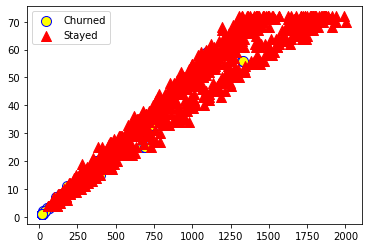

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(phone_churned_charge,phone_churned_tenure_months,c ="yellow",
            linewidths = 1,
            marker ="o",
            edgecolor ="blue",
            s =100,label='Churned')
ax1.scatter(phone_stayed_charge,phone_stayed_tenure_months, c ="red",
            linewidths = 1,
            marker ="^",
            edgecolor ="red",
            s =100,label='Stayed')
plt.legend(loc='upper left')
plt.show()